In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.utils import simple_preprocess
import unicodedata
nltk.download('wordnet')

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

pd.set_option('display.max_columns', None)
df = pd.read_csv(r'D:\Datasets\Amazon\datafiniti-consumer-reviews-of-amazon-products\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pratyush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [2]:
codes = {0:'Bad', 1:'Bad', 2:'Bad', 3 : 'Average', 4 : 'Good', 5 : 'Very Good'}
df['Review_'] = df['reviews.rating'].map(codes)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Review_
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",Average
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",Good
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",Very Good
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",Very Good
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",Very Good


In [3]:
df_electronics = df[df['primaryCategories'] == 'Electronics']
df_electronics['name'].value_counts()

Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers                                                               2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black                                                           2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                                                                          1425
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                                                         1212
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black                                                                           1024
Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers                                                                             987
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers               

In [4]:
df_fire = df[df['name'].str.contains("Fire HD 8")]
df_fire.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Review_
13386,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-24T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,While there are some apps that are missing due...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com/3545/5620406/review...,Very Good
13388,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-14T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I bought one last year for one cousin and had ...,2nd purchase,VanStriker,http://reviews.bestbuy.com/3545/5620406/review...,Good
13392,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I will try again for the 3rd time with my new ...,3rd time is the charm,HotTNMomma,http://reviews.bestbuy.com/3545/5620406/review...,Good
13393,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-17T00:00:00.000Z,"2017-08-09T00:00:00Z,2017-03-05T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5538501/review...,"bought this for my father, who never did much ...",5 star service,packersfan,http://reviews.bestbuy.com/3545/5620406/review...,Very Good
13394,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-03-21T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,This was a request from our 7 yr old granddaug...,7 year old granddaughter loves it,Intheknow,http://reviews.bestbuy.com/3545/5620406/review...,Very Good


In [5]:
df_fire['name'].value_counts()

Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers              2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black          2370
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers     883
All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case                 293
All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case                 233
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers     160
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue            156
Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers               156
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black           140
Amazon Fire HD 8 with Alexa (8" HD Display Tablet)                                              130


In [6]:
df_fire[['col1', 'col2', 'col3', 'col4', 'col5']] = df_fire['name'].str.split(',', expand=True)
df_fire.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Review_,col1,col2,col3,col4,col5
13386,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-24T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,While there are some apps that are missing due...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black
13388,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-14T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I bought one last year for one cousin and had ...,2nd purchase,VanStriker,http://reviews.bestbuy.com/3545/5620406/review...,Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black
13392,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I will try again for the 3rd time with my new ...,3rd time is the charm,HotTNMomma,http://reviews.bestbuy.com/3545/5620406/review...,Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black
13393,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-17T00:00:00.000Z,"2017-08-09T00:00:00Z,2017-03-05T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5538501/review...,"bought this for my father, who never did much ...",5 star service,packersfan,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black
13394,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-03-21T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,This was a request from our 7 yr old granddaug...,7 year old granddaughter loves it,Intheknow,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black


In [7]:
print(df_fire.shape)
df_fire.isna().sum()

(7146, 30)


id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateSeen          0
reviews.didPurchase    7146
reviews.doRecommend       0
reviews.id             7116
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title             0
reviews.username          0
sourceURLs                0
Review_                   0
col1                      0
col2                    130
col3                    130
col4                    130
col5                   4298
dtype: int64

In [8]:
df_fire['col1'].value_counts()

All-New Fire HD 8 Tablet                              2848
Fire HD 8 Tablet with Alexa                           2599
All-New Fire HD 8 Tablet with Alexa                   1043
All-New Fire HD 8 Kids Edition Tablet                  526
Amazon Fire HD 8 with Alexa (8" HD Display Tablet)     130
Name: col1, dtype: int64

In [9]:
df_fire['col2'].value_counts()

 8 HD Display    7016
Name: col2, dtype: int64

In [10]:
df_fire['col3'].value_counts()

 16 GB    3326
 Wi-Fi    2848
 32 GB     842
Name: col3, dtype: int64

In [11]:
df_fire['col4'].value_counts()

 Tangerine - with Special Offers      2599
 16 GB - Includes Special Offers      2437
 Marine Blue - with Special Offers    1043
 32 GB - Includes Special Offers       411
 Pink Kid-Proof Case                   293
 Blue Kid-Proof Case                   233
Name: col4, dtype: int64

In [12]:
df_fire['col5'].value_counts()

 Black      2510
 Blue        223
 Magenta     115
Name: col5, dtype: int64

## Analyzing the Tablets without Alexa (Non Kids)

In [13]:
df_fire_noalexa = df_fire[~df_fire["col1"].str.contains('Alexa')]
df_fire_noalexa = df_fire_noalexa[~df_fire_noalexa['col1'].str.contains('Kids')]
df_fire_noalexa['col1'].value_counts()

All-New Fire HD 8 Tablet    2848
Name: col1, dtype: int64

In [14]:
df_fire_noalexa['Review_Length'] = df_fire_noalexa['reviews.text'].map(len)
df_fire_noalexa.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Review_,col1,col2,col3,col4,col5,Review_Length
13386,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-24T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,While there are some apps that are missing due...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,323
13388,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-14T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I bought one last year for one cousin and had ...,2nd purchase,VanStriker,http://reviews.bestbuy.com/3545/5620406/review...,Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,95
13392,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I will try again for the 3rd time with my new ...,3rd time is the charm,HotTNMomma,http://reviews.bestbuy.com/3545/5620406/review...,Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,90
13393,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-17T00:00:00.000Z,"2017-08-09T00:00:00Z,2017-03-05T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5538501/review...,"bought this for my father, who never did much ...",5 star service,packersfan,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,257
13394,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-03-21T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,This was a request from our 7 yr old granddaug...,7 year old granddaughter loves it,Intheknow,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,400


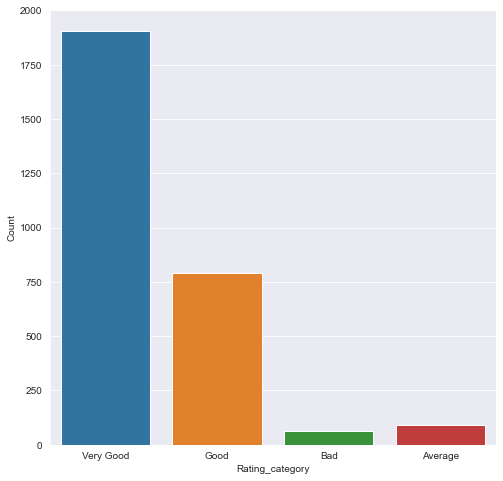

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='Review_', data=df_fire_noalexa)
plt.xlabel('Rating_category')
plt.ylabel('Count')
plt.show()

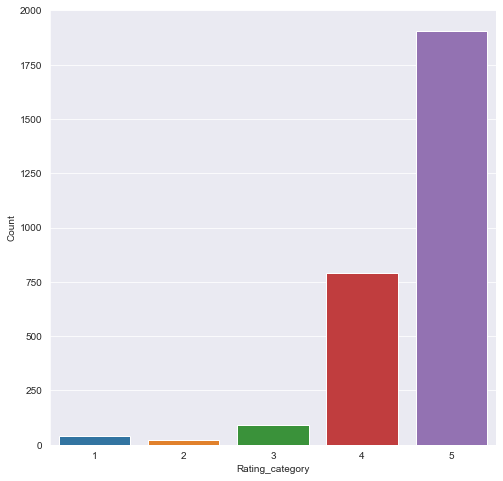

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(x='reviews.rating', data=df_fire_noalexa)
plt.xlabel('Rating_category')
plt.ylabel('Count')
plt.show()

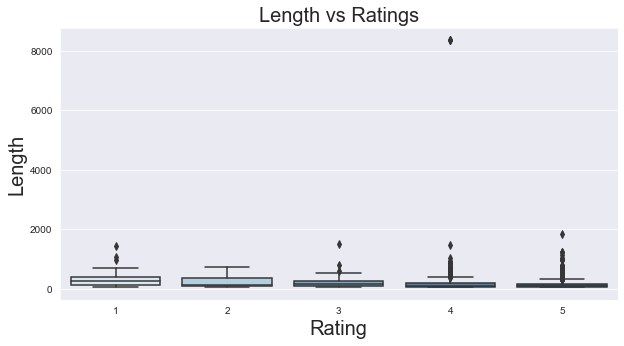

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_fire_noalexa['reviews.rating'], df_fire_noalexa['Review_Length'], palette = 'Blues')
plt.title("Length vs Ratings", fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Length', fontsize=20);

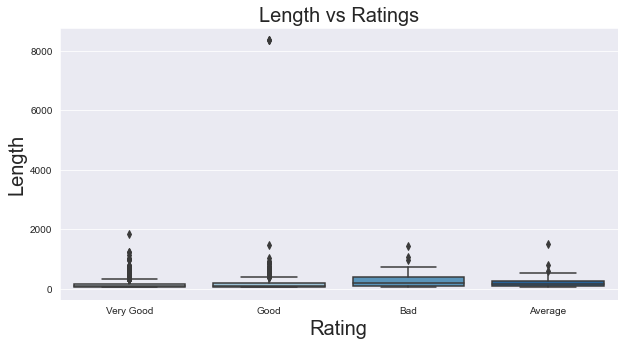

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_fire_noalexa['Review_'], df_fire_noalexa['Review_Length'], palette = 'Blues')
plt.title("Length vs Ratings", fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Length', fontsize=20);

In [19]:
df_fire_noalexa['reviews.text'] = df_fire_noalexa['reviews.text'].map(lambda x: re.sub('[,\.!?]', '', x))
df_fire_noalexa['reviews.text'] = df_fire_noalexa['reviews.text'].map(lambda x: x.lower())

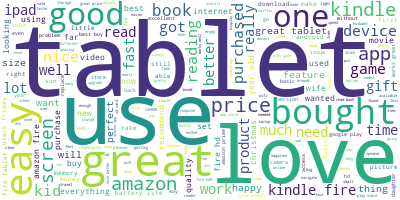

In [20]:
long_string = ','.join(list(df_fire_noalexa['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [21]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [22]:
words = basic_clean(''.join(str(df_fire_noalexa['reviews.text'].tolist())))
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]

(easy, use)           245
(kindle, fire)        189
(great, tablet)       133
(fire, hd)            108
(year, old)           104
(amazon, fire)         88
(tablet, great)        87
(battery, life)        87
(work, great)          83
(would, recommend)     80
(play, game)           78
(black, friday)        75
(google, play)         73
(fire, tablet)         73
(great, price)         72
dtype: int64

Text(0.5, 0, '# of Occurances')

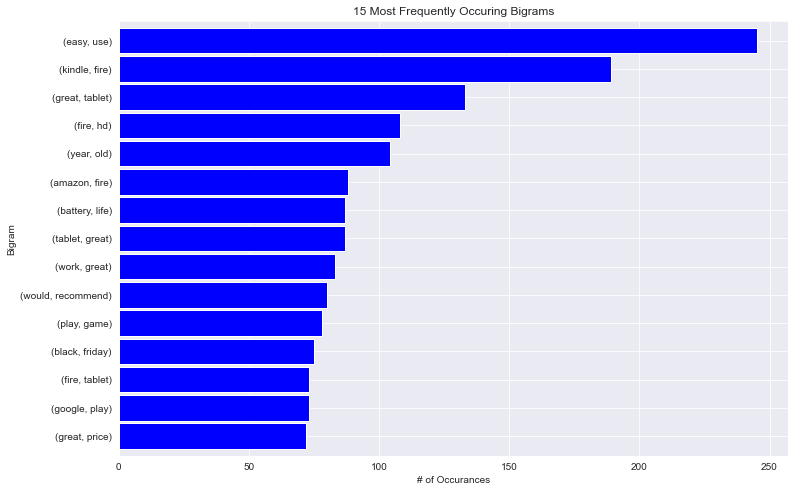

In [23]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

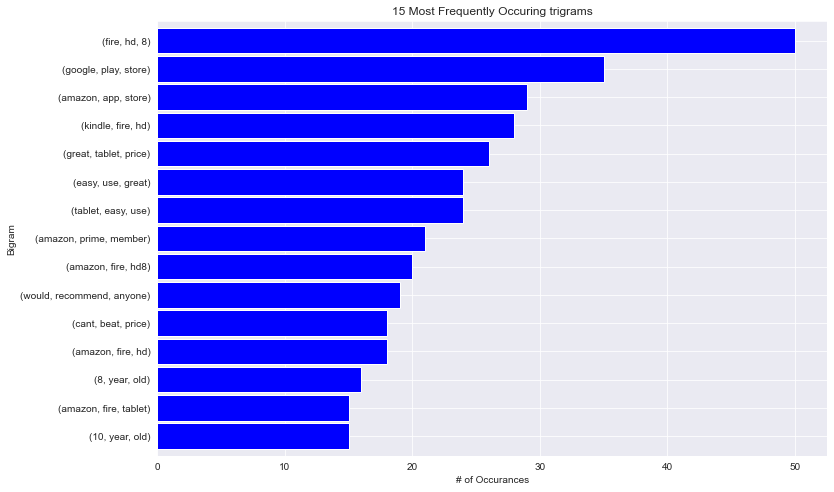

In [24]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]


trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring trigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [25]:
df_1 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 1]
df_2 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 2]
df_3 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 3]
df_4 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 4]
df_5 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 5]

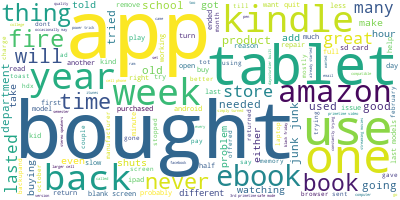

In [26]:
long_string = ','.join(list(df_1['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Text(0.5, 0, '# of Occurances')

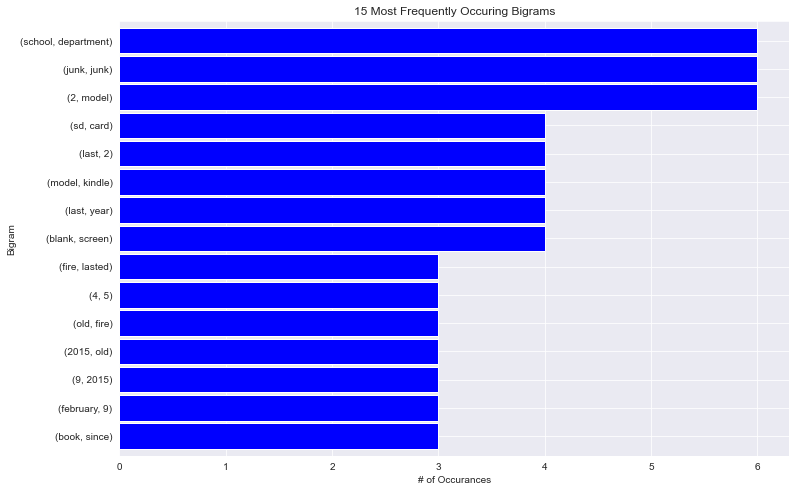

In [27]:
words = basic_clean(''.join(str(df_1['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

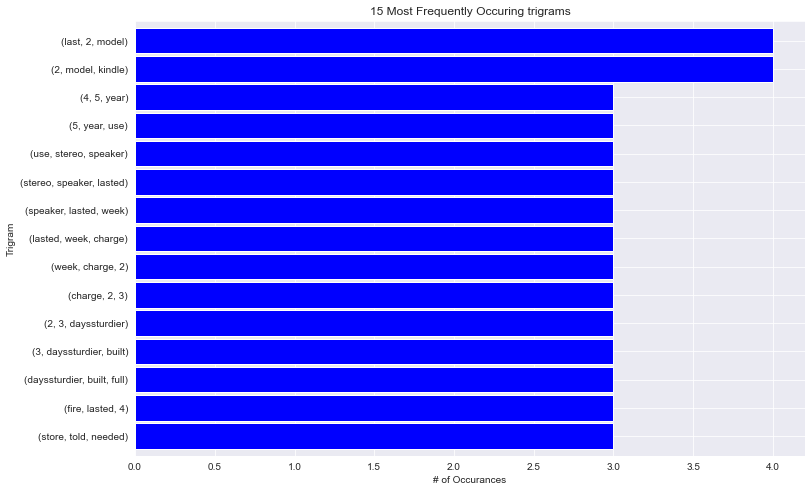

In [28]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]


trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

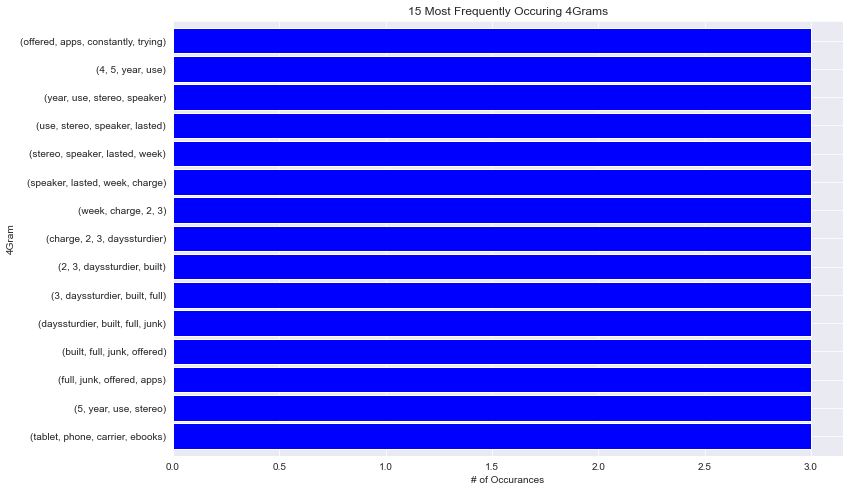

In [29]:
trigrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:15]


trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring 4Grams')
plt.ylabel('4Gram')
plt.xlabel('# of Occurances')

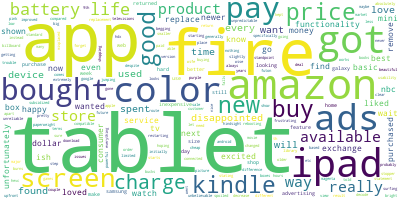

In [30]:
long_string = ','.join(list(df_2['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Text(0.5, 0, '# of Occurances')

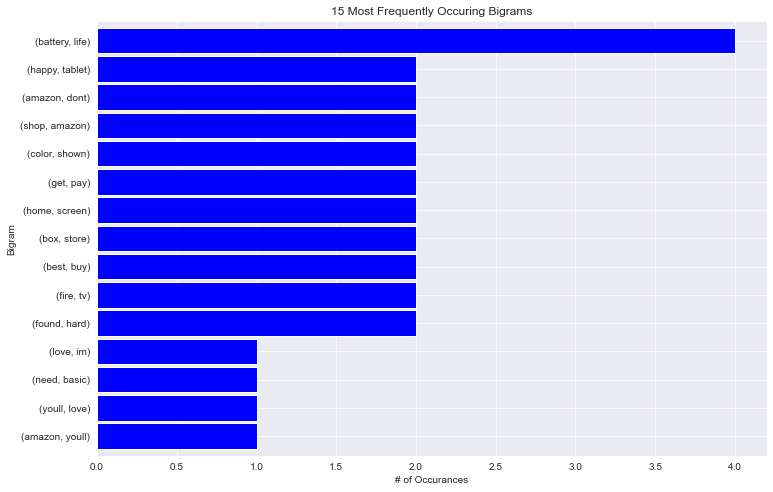

In [31]:
words = basic_clean(''.join(str(df_2['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

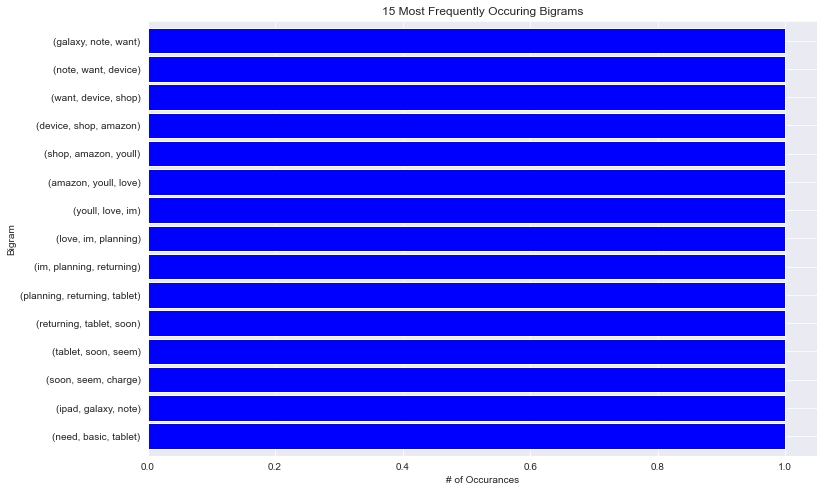

In [32]:
words = basic_clean(''.join(str(df_2['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

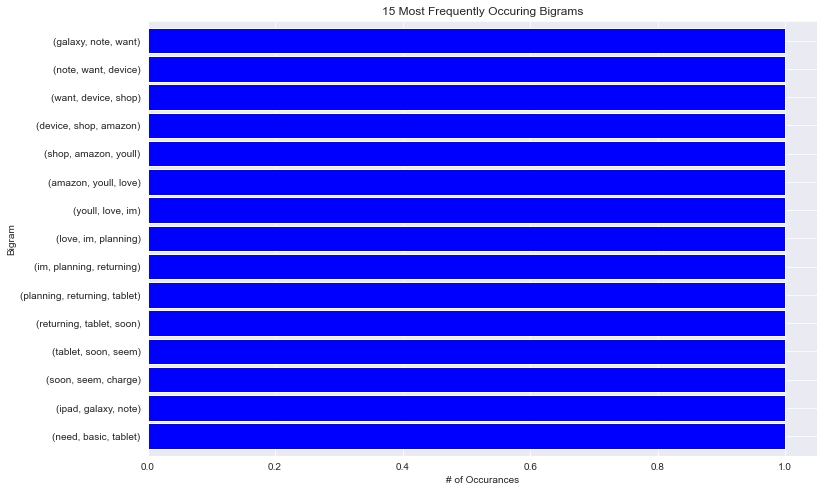

In [33]:
words = basic_clean(''.join(str(df_2['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

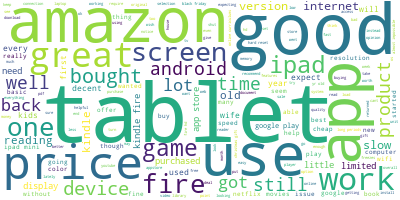

In [34]:
long_string = ','.join(list(df_3['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Text(0.5, 0, '# of Occurances')

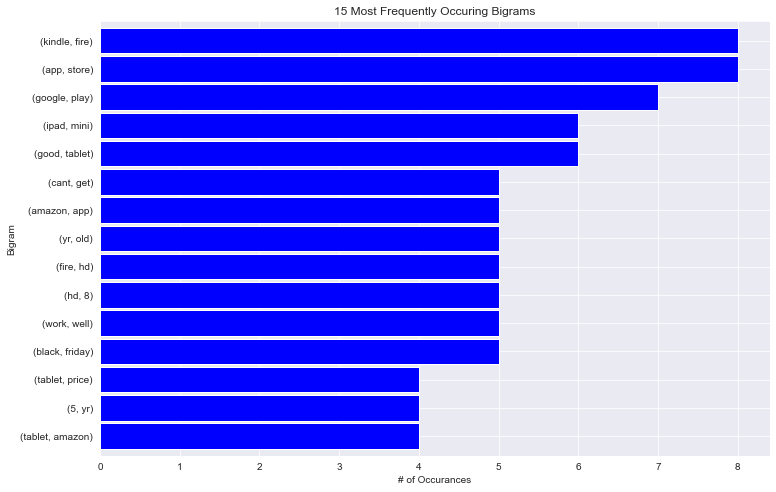

In [35]:
words = basic_clean(''.join(str(df_3['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

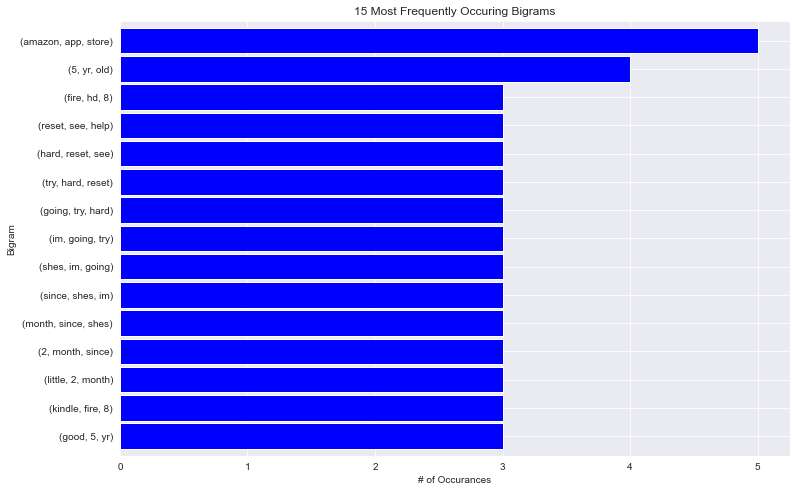

In [36]:
words = basic_clean(''.join(str(df_3['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

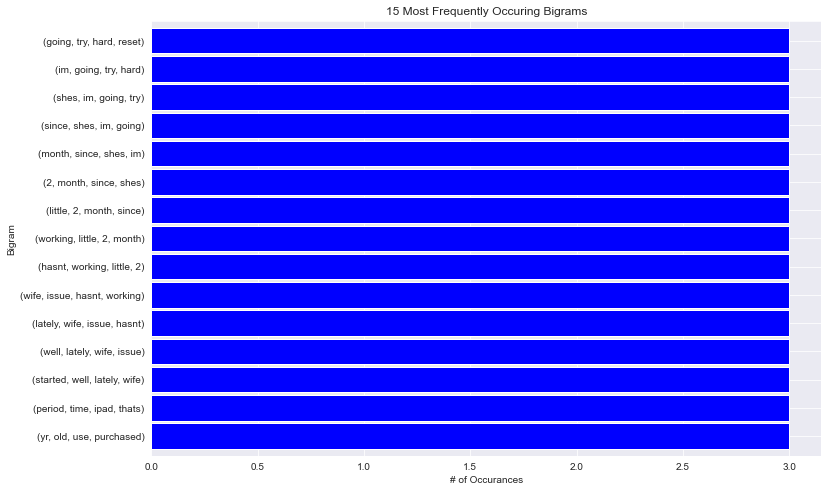

In [37]:
words = basic_clean(''.join(str(df_3['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

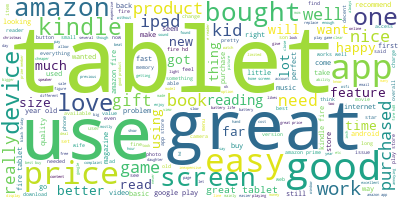

In [38]:
long_string = ','.join(list(df_4['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Text(0.5, 0, '# of Occurances')

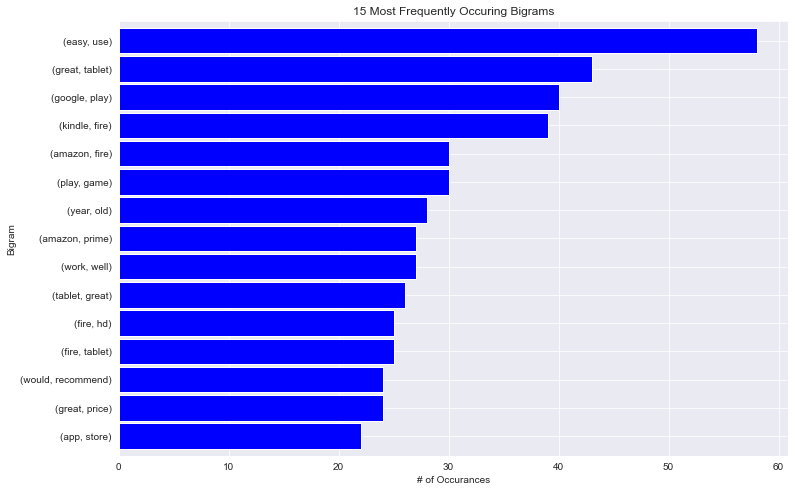

In [39]:
words = basic_clean(''.join(str(df_4['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

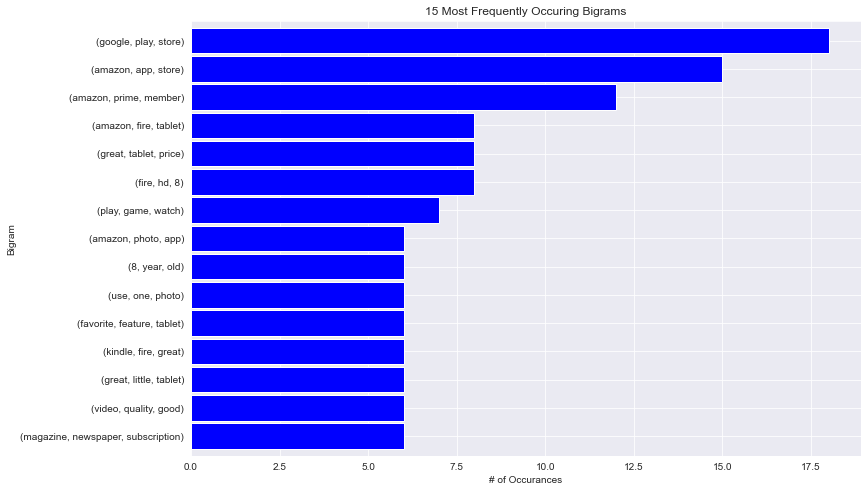

In [40]:
words = basic_clean(''.join(str(df_4['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

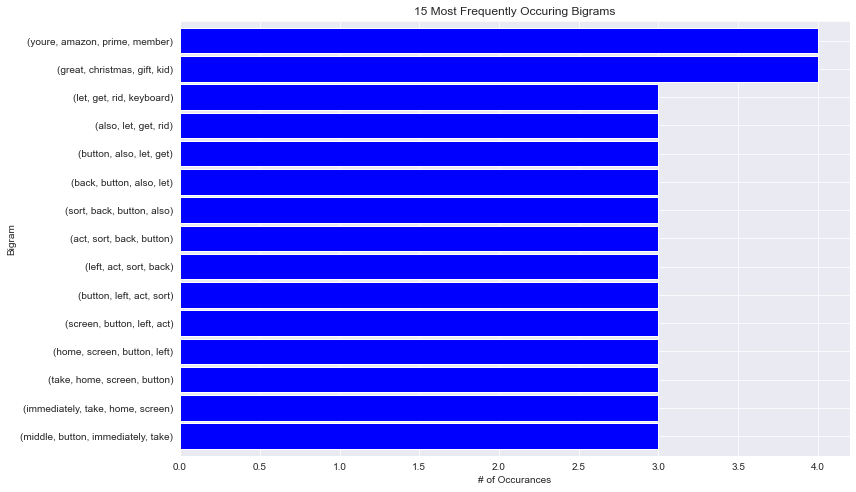

In [41]:
words = basic_clean(''.join(str(df_4['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

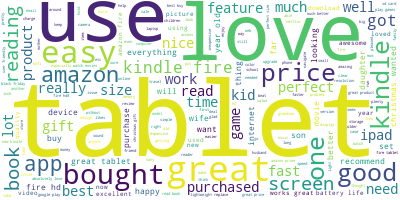

In [42]:
long_string = ','.join(list(df_5['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

Text(0.5, 0, '# of Occurances')

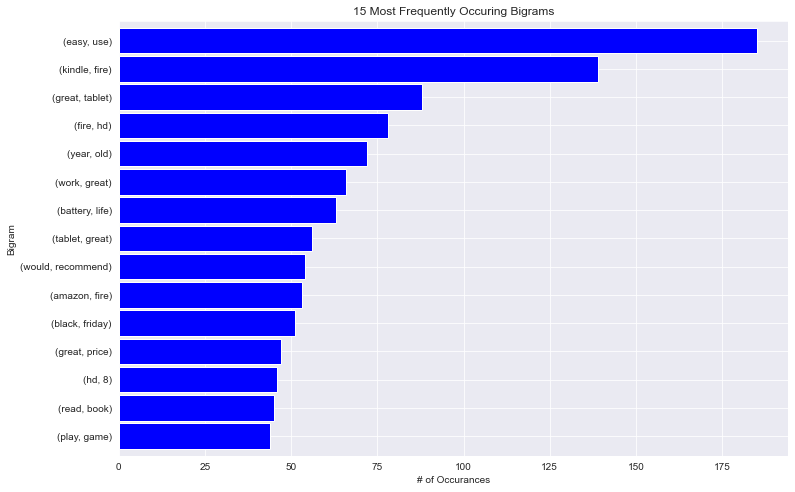

In [43]:
words = basic_clean(''.join(str(df_5['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

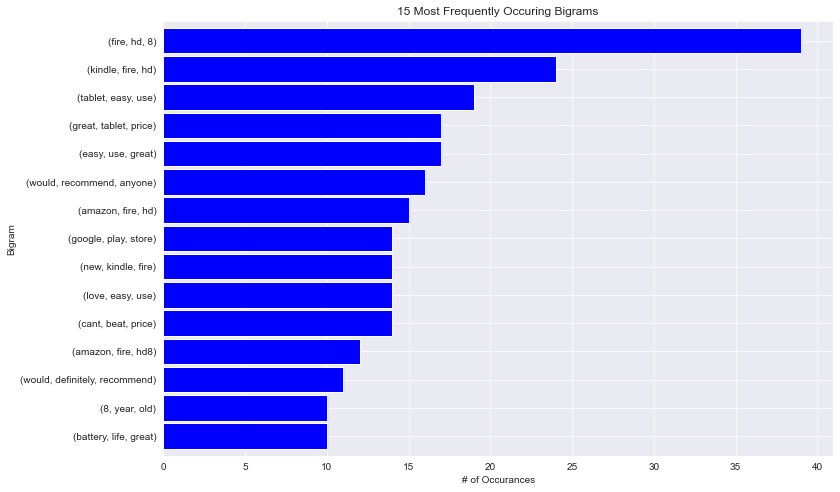

In [44]:
words = basic_clean(''.join(str(df_5['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

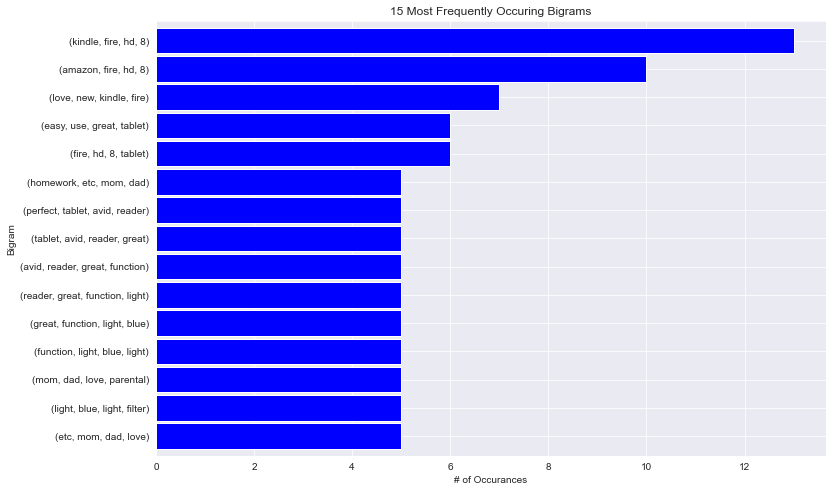

In [45]:
words = basic_clean(''.join(str(df_5['reviews.text'].tolist())))
bigrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:15]


bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('15 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

## Topic Modeling

In [46]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_fire_noalexa['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['apps', 'missing', 'due', 'using', 'google', 'play', 'store', 'list', 'minimal', 'tablet', 'quick', 'responsive', 'noticeable', 'nicer', 'fire', 'picked', 'sale', 'black', 'friday', 'sales', 'great', 'front', 'tv', 'catching', 'email', 'light', 'web', 'browsing']


In [47]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


In [48]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"tablet" + 0.017*"price" + 0.016*"bought" + 0.013*"great" + '
  '0.012*"kindle" + 0.012*"good" + 0.011*"love" + 0.011*"screen" + 0.010*"old" '
  '+ 0.009*"games"'),
 (1,
  '0.025*"tablet" + 0.022*"great" + 0.020*"love" + 0.019*"use" + 0.016*"fire" '
  '+ 0.016*"kindle" + 0.016*"amazon" + 0.013*"easy" + 0.011*"good" + '
  '0.009*"apps"'),
 (2,
  '0.035*"tablet" + 0.032*"great" + 0.019*"good" + 0.014*"amazon" + '
  '0.013*"use" + 0.013*"price" + 0.011*"one" + 0.009*"bought" + 0.009*"would" '
  '+ 0.008*"product"'),
 (3,
  '0.023*"great" + 0.023*"tablet" + 0.020*"use" + 0.015*"easy" + 0.014*"price" '
  '+ 0.011*"kindle" + 0.009*"good" + 0.009*"well" + 0.009*"amazon" + '
  '0.008*"read"'),
 (4,
  '0.027*"tablet" + 0.022*"fire" + 0.017*"use" + 0.017*"great" + '
  '0.014*"bought" + 0.014*"kindle" + 0.014*"easy" + 0.012*"one" + '
  '0.010*"screen" + 0.009*"amazon"')]


In [49]:
import pyLDAvis
import pickle 
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Overall_1' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.001367 -0.001424       1        1  30.221540
4     -0.044132  0.004275       2        1  20.160281
2      0.001926  0.035255       3        1  20.051842
0      0.039936  0.007093       4        1  15.536276
3      0.003638 -0.045199       5        1  14.030061, topic_info=       Term        Freq       Total Category  logprob  loglift
409    love  432.000000  432.000000  Default  30.0000  30.0000
233   price  472.000000  472.000000  Default  29.0000  29.0000
60      use  675.000000  675.000000  Default  28.0000  28.0000
10    great  952.000000  952.000000  Default  27.0000  27.0000
374    good  493.000000  493.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
108  screen   40.348758  364.514000   Topic5  -5.0169  -0.2370
35      one   40.727049  393.248835   Topic5  -5.0076  -0.3036
6      fire   44.717158  561.638050   Topic5  -4.9141  -0.5665
142   books   31.506431  260.876185   Topic5  -5.2643  -0.1499
29   bought   30.376182  437.447120   Topic5  -5.3008  -0.7033

[421 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3294      2  0.695948  accidentally
45        1  0.162989      actually
45        2  0.217319      actually
45        3  0.108660      actually
45        4  0.434639      actually
...     ...       ...           ...
94        1  0.120164            yr
94        2  0.150204            yr
94        3  0.150204            yr
94        4  0.360491            yr
94        5  0.240327            yr

[847 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4])

In [50]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_1['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['bring', 'back', 'exchange', 'different', 'make']


In [51]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [52]:
from pprint import pprint
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"bought" + 0.010*"one" + 0.010*"tablet" + 0.010*"use" + 0.008*"apps" '
  '+ 0.008*"kindle" + 0.007*"get" + 0.007*"back" + 0.007*"junk" + '
  '0.006*"week"'),
 (1,
  '0.012*"bought" + 0.011*"apps" + 0.011*"tablet" + 0.009*"get" + 0.009*"use" '
  '+ 0.009*"week" + 0.008*"junk" + 0.008*"back" + 0.007*"one" + '
  '0.006*"amazon"')]


In [53]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Bad' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster      Freq
topic                                          
0      0.006223  0.0       1        1  57.25401
1     -0.006223  0.0       2        1  42.74599, topic_info=           Term       Freq      Total Category  logprob  loglift
409      ebooks   4.000000   4.000000  Default  30.0000  30.0000
282       right   3.000000   3.000000  Default  29.0000  29.0000
43         apps  11.000000  11.000000  Default  28.0000  28.0000
407  department   4.000000   4.000000  Default  27.0000  27.0000
270        week   9.000000   9.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
418       store   2.355897   5.647120   Topic2  -5.4071  -0.0243
168       never   2.456870   6.387715   Topic2  -5.3652  -0.1056
167        many   2.278643   5.661033   Topic2  -5.4405  -0.0601
149        year   2.372425   6.402841   Topic2  -5.4001  -0.1429
84        books   2.151202   5.683882   Topic2  -5.4980  -0.1217

[158 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
180       1  0.690700    account
181       1  0.690742     adding
401       1  0.578446    already
401       2  0.578446    already
41        1  0.598861       also
...     ...       ...        ...
231       1  0.692763  worthless
210       1  0.702225      would
210       2  0.468150      would
149       1  0.624723       year
149       2  0.312361       year

[192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [54]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_2['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['need', 'basic', 'tablet', 'fire', 'works', 'falls', 'apart', 'compared', 'ipad', 'mini', 'usability', 'functionality', 'available', 'apps', 'standpoint']


In [55]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [56]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"tablet" + 0.014*"ads" + 0.013*"pay" + 0.012*"got" + 0.012*"would" + '
  '0.010*"get" + 0.010*"amazon" + 0.010*"fire" + 0.009*"apps" + 0.009*"every"'),
 (1,
  '0.020*"tablet" + 0.016*"ipad" + 0.014*"apps" + 0.012*"fire" + 0.009*"used" '
  '+ 0.009*"amazon" + 0.008*"got" + 0.008*"get" + 0.008*"basic" + '
  '0.008*"hard"'),
 (2,
  '0.015*"tablet" + 0.013*"good" + 0.013*"charge" + 0.011*"amazon" + '
  '0.011*"color" + 0.010*"th" + 0.009*"battery" + 0.009*"life" + '
  '0.009*"bought" + 0.009*"use"')]


In [57]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Bad2' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.034963  0.026350       1        1  41.913187
2     -0.049050  0.008713       2        1  35.876421
1      0.014087 -0.035062       3        1  22.210393, topic_info=        Term      Freq     Total Category  logprob  loglift
8       ipad  3.000000  3.000000  Default  30.0000  30.0000
32      good  3.000000  3.000000  Default  29.0000  29.0000
3      basic  1.000000  1.000000  Default  28.0000  28.0000
1       apps  4.000000  4.000000  Default  27.0000  27.0000
176     hard  1.000000  1.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
44       pay  0.615759  3.771872   Topic3  -5.1665  -0.3079
200      web  0.571001  1.709331   Topic3  -5.2420   0.4081
218     make  0.567322  1.713776   Topic3  -5.2484   0.3991
48   product  0.575613  2.407368   Topic3  -5.2339   0.0738
151    money  0.563236  1.714508   Topic3  -5.2557   0.3914

[193 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
129       1  0.687143          ads
129       2  0.229048          ads
129       3  0.229048          ads
130       1  0.557109  advertising
204       1  0.768861         alot
...     ...       ...          ...
200       3  0.585024          web
255       2  0.532871         week
313       1  0.769392      without
14        3  0.971468        works
162       1  0.631544        would

[197 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [58]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_3['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['hoping', 'use', 'google', 'launcher', 'tablet', 'really', 'locked', 'cannot', 'change', 'launcher', 'lock', 'screen', 'still', 'cheap', 'fine', 'watching', 'movies']


In [59]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


In [60]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"tablet" + 0.014*"apps" + 0.012*"amazon" + 0.012*"good" + '
  '0.010*"google" + 0.009*"play" + 0.009*"app" + 0.009*"great" + 0.008*"fire" '
  '+ 0.007*"screen"'),
 (1,
  '0.016*"fire" + 0.011*"amazon" + 0.011*"great" + 0.010*"kindle" + '
  '0.009*"tablet" + 0.008*"wife" + 0.008*"good" + 0.007*"bought" + 0.007*"hd" '
  '+ 0.007*"ipad"'),
 (2,
  '0.030*"tablet" + 0.023*"good" + 0.016*"use" + 0.013*"price" + '
  '0.010*"amazon" + 0.010*"ipad" + 0.010*"get" + 0.009*"fire" + 0.009*"old" + '
  '0.007*"internet"')]


In [61]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Avg' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.044349 -0.015726       1        1  41.490506
1     -0.038735 -0.023723       2        1  30.749320
0     -0.005614  0.039449       3        1  27.760173, topic_info=        Term       Freq      Total Category  logprob  loglift
594     wife   5.000000   5.000000  Default  30.0000  30.0000
151     apps  13.000000  13.000000  Default  29.0000  29.0000
4     google   9.000000   9.000000  Default  28.0000  28.0000
13    tablet  37.000000  37.000000  Default  27.0000  27.0000
659    reset   3.000000   3.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
80     price   3.640168  16.556289   Topic3  -4.9483  -0.2332
322      one   2.533465  11.361853   Topic3  -5.3107  -0.2191
14       use   2.954548  18.120343   Topic3  -5.1569  -0.5321
68      ipad   2.624756  14.300882   Topic3  -5.2753  -0.4138
121  android   2.114764   7.119455   Topic3  -5.4913   0.0677

[223 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
188       3  0.716266    added
302       1  0.916452      ads
370       3  0.716369    alexa
692       3  0.716050   alight
413       1  0.823504   almost
...     ...       ...      ...
64        2  0.574994  working
73        1  0.315622    works
73        2  0.315622    works
73        3  0.473433    works
243       1  0.903089       yr

[294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [62]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_4['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['bought', 'one', 'last', 'year', 'one', 'cousin', 'continue', 'another', 'year', 'great', 'buy', 'imo']


In [63]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2)]


In [64]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"use" + 0.016*"tablet" + 0.015*"amazon" + 0.013*"fire" + '
  '0.012*"kindle" + 0.009*"one" + 0.009*"screen" + 0.009*"device" + '
  '0.009*"like" + 0.008*"easy"'),
 (1,
  '0.032*"tablet" + 0.023*"great" + 0.014*"good" + 0.014*"price" + '
  '0.012*"easy" + 0.011*"apps" + 0.010*"use" + 0.010*"screen" + 0.009*"bought" '
  '+ 0.009*"amazon"'),
 (2,
  '0.032*"tablet" + 0.020*"great" + 0.020*"good" + 0.016*"use" + '
  '0.014*"amazon" + 0.013*"price" + 0.009*"bought" + 0.009*"fire" + '
  '0.007*"screen" + 0.007*"like"')]


In [65]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Good' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.027681 -0.013709       1        1  39.939011
2     -0.028452 -0.012624       2        1  32.473734
1      0.000771  0.026334       3        1  27.587255, topic_info=       Term        Freq       Total Category  logprob  loglift
39   tablet  361.000000  361.000000  Default  30.0000  30.0000
5     great  227.000000  227.000000  Default  29.0000  29.0000
192    good  188.000000  188.000000  Default  28.0000  28.0000
87    price  143.000000  143.000000  Default  27.0000  27.0000
207   works   54.000000   54.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
56   kindle   25.772403  119.079447   Topic3  -5.0199  -0.2427
163   would   20.076588   80.298130   Topic3  -5.2696  -0.0984
41    books   18.825327   78.170663   Topic3  -5.3340  -0.1359
167    like   19.432480   98.202835   Topic3  -5.3022  -0.3323
52     also   15.006941   49.580117   Topic3  -5.5606   0.0927

[250 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
367       1  0.240600            ads
367       2  0.661651            ads
367       3  0.120300            ads
493       1  0.415653  advertisement
493       3  0.831307  advertisement
...     ...       ...            ...
163       1  0.398515          would
163       2  0.348701          would
163       3  0.249072          would
394       1  0.938075            yet
394       3  0.085280            yet

[399 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [66]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_5['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['apps', 'missing', 'due', 'using', 'google', 'play', 'store', 'list', 'minimal', 'tablet', 'quick', 'responsive', 'noticeable', 'nicer', 'fire', 'picked', 'sale', 'black', 'friday', 'sales', 'great', 'front', 'tv', 'catching', 'email', 'light', 'web', 'browsing']


In [67]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


In [68]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"great" + 0.023*"tablet" + 0.018*"use" + 0.018*"love" + 0.018*"easy" '
  '+ 0.014*"kindle" + 0.014*"price" + 0.012*"books" + 0.011*"fire" + '
  '0.010*"bought"'),
 (1,
  '0.023*"tablet" + 0.017*"great" + 0.015*"good" + 0.015*"use" + 0.013*"price" '
  '+ 0.013*"easy" + 0.012*"love" + 0.011*"amazon" + 0.010*"fire" + '
  '0.009*"like"'),
 (2,
  '0.037*"tablet" + 0.028*"great" + 0.019*"fire" + 0.017*"kindle" + '
  '0.015*"one" + 0.014*"use" + 0.014*"bought" + 0.012*"loves" + 0.010*"love" + '
  '0.010*"good"')]


In [69]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'VeryGood' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.012349 -0.029474       1        1  38.875575
2     -0.020769  0.024869       2        1  38.705380
1      0.033118  0.004605       3        1  22.419045, topic_info=        Term        Freq       Total Category  logprob  loglift
299     good  244.000000  244.000000  Default  30.0000  30.0000
412     like  123.000000  123.000000  Default  29.0000  29.0000
115    books  166.000000  166.000000  Default  28.0000  28.0000
129     easy  332.000000  332.000000  Default  27.0000  27.0000
198    price  291.000000  291.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
97    kindle   48.971923  359.924078   Topic3  -4.7679  -0.4994
31    bought   41.171078  280.827582   Topic3  -4.9414  -0.4247
66   perfect   27.284758  123.056585   Topic3  -5.3529  -0.0111
163   screen   34.067985  207.010390   Topic3  -5.1308  -0.3092
84     loves   32.905506  196.584188   Topic3  -5.1655  -0.2922

[269 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1441      1  0.788385    addition
1441      2  0.157677    addition
1730      1  0.883320       adult
1730      2  0.220830       adult
1332      1  0.883276  advertised
...     ...       ...         ...
422       2  0.093894       worry
422       3  0.563365       worry
47        1  0.518614       would
47        2  0.369424       would
47        3  0.113669       would

[438 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])